In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import matplotlib.patches as patches


In [2]:
undamped_data = {
    "lambda": [7.000E-06,8.000E-06,9.000E-06,1.000E-05,1.100E-05,1.200E-05,1.300E-05,1.400E-05,1.50E-05,1.60E-05,2.00E-05,2.60E-05,4.00E-05,8.00E-05],
    "hGan/Lambda": [0.63, 0.55, 0.49, 0.440, 0.400, 0.367, 0.338,0.314,0.293,0.275,0.220,0.169, .110,.055],
    "Antisymmetric ksq%": [0.055, 0.081, 0.103, 0.121, 0.134, 0.143, 0.148,0.150 ,0.152,0.149, 0.134,0.105,.064,.031],
    "Symmetric ksq%": [0.275, 0.358, 0.448, 0.533, 0.602, 0.643, 0.652,0.641,0.624,0.604,.56,.552,0.567,.576]
}
undamped_df = pd.DataFrame(undamped_data)

In [3]:
#filepath = '/home/erik/OneDrive/Research/Data/'
filename = 'Comsol_ksq_data_inf.xlsx'
df = pd.read_excel(filename)


In [17]:
df.iloc[5:8]

,wavelengths,eigAS,eigS,hGaN/lambda,Q_Nd1e15_A0,Q_Nd1e15_S0,Q_Nd1e16_A0,Q_Nd1e16_S0,Q_Nd1e17_A0,Q_Nd1e17_S0,...,ksq_Nd1e17_A0,ksq_Nd1e17_S0,fQ_Nd1e15_A0,fQ_Nd1e15_S0,fQ_Nd1e16_A0,fQ_Nd1e16_S0,fQ_Nd1e17_A0,fQ_Nd1e17_S0,A0_velocity,S0_velocity
5,0.000012,263970000,570720000,0.36667,1341.4,676.88,2298.9,2881.1,2461.7,4125.5,...,0,0,354070000000,386310000000,606830000000,1644300000000,649790000000,2354500000000,3167.6,6848.6
6,0.000013,238240000,543450000,0.33846,1378.4,715.25,2228.5,2993.6,2363.5,4246.6,...,0,0,328390000000,388710000000,530920000000,1626900000000,563090000000,2307800000000,3097.2,7064.9
7,0.000014,216160000,516230000,0.31429,1397.3,757.30,2139.3,2993.7,2250.0,4121.0,...,0,0,302050000000,390940000000,462440000000,1545500000000,486360000000,2127400000000,3026.3,7227.2


In [5]:
df.columns

Index(['wavelengths', 'eigAS', 'eigS', 'hGaN/lambda', 'Q_Nd1e15_A0',
       'Q_Nd1e15_S0', 'Q_Nd1e16_A0', 'Q_Nd1e16_S0', 'Q_Nd1e17_A0',
       'Q_Nd1e17_S0', 'ksq_Nd1e15_A0', 'ksq_Nd1e15_S0', 'ksq_Nd1e16_A0',
       'ksq_Nd1e16_S0', 'ksq_Nd1e17_A0', 'ksq_Nd1e17_S0', 'fQ_Nd1e15_A0',
       'fQ_Nd1e15_S0', 'fQ_Nd1e16_A0', 'fQ_Nd1e16_S0', 'fQ_Nd1e17_A0',
       'fQ_Nd1e17_S0', 'A0_velocity', 'S0_velocity'],
      dtype='object')

Text(0, 0.5, '$k^2$ [%]')

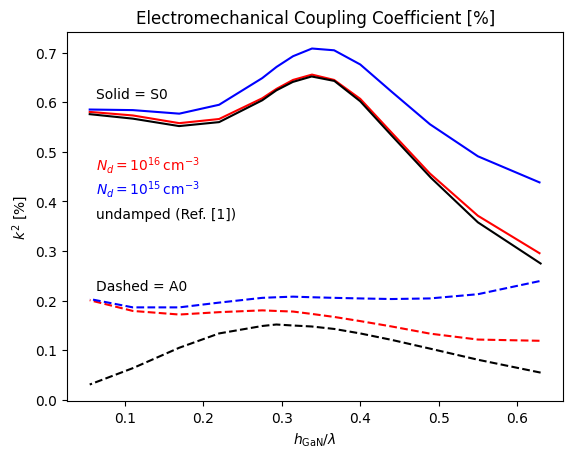

In [92]:
fig, ax = plt.subplots()
# curves of Nd = 1e16 are red, with red text stating Nd = 1e16
#curves of Nd = 1e15 are blue, with blue text stating Nd = 1e15
# undamped curves are black, with black text stating 'undamped'
# A0 modes are dashed, S0 modes are solid
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_A0']*100, color='r', linestyle='--', label = '-- A0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e15_A0']*100, color='b', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_S0']*100, color='r', linestyle='-', label = '- S0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e15_S0']*100, color='b', linestyle='-')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Antisymmetric ksq%"], color='k', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Symmetric ksq%"], color='k', linestyle='-')#, label = r'$k^2 [\%]$')
# Annotations
# Nd annotations in figure coordinates (left, midway up)
ax.annotate(r'$N_d = 10^{16} \,\text{cm}^{-3}$', xy=(0.15, 0.6), xycoords='figure fraction', color='r', fontsize=10)
ax.annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.15, 0.55), xycoords='figure fraction', color='b', fontsize=10)
ax.annotate('undamped (Ref. [1])', xy=(0.15, 0.5), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
#ax.text(0.1, 0.13, 'Dashed = A0', color='black', fontsize=10)
#ax.text(0.1, 0.6, 'Solid = S0', color='black', fontsize=10)
ax.annotate('Dashed = A0', xy=(0.15, 0.35), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.75), xycoords='figure fraction', color='k', fontsize=10)
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title('Electromechanical Coupling Coefficient [%]')
ax.set_ylabel(r'$k^2$ [%]')
#arc_s0 = patches.Arc((0.35, 0.57), width=0.5, height=0.15, angle=0, theta1=30, theta2=330,
#                     edgecolor='gray', linestyle='-', linewidth=1.2)
#ax.add_patch(arc_s0)

Text(0, 0.5, '$Q\\cdot k^2$ [%]')

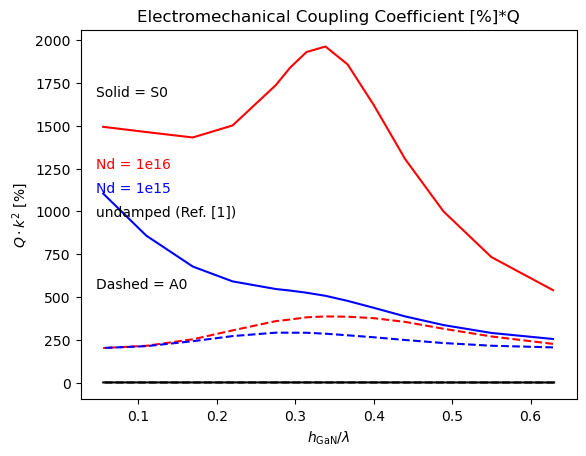

In [5]:
fig, ax = plt.subplots()

ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_A0']*100*df['Q_Nd1e16_A0'], color='r', linestyle='--', label = '-- A0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e15_A0']*100*df['Q_Nd1e15_A0'], color='b', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_S0']*100*df['Q_Nd1e16_S0'], color='r', linestyle='-', label = '- S0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e15_S0']*100*df['Q_Nd1e15_S0'], color='b', linestyle='-')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Antisymmetric ksq%"], color='k', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Symmetric ksq%"], color='k', linestyle='-')#, label = r'$k^2 [\%]$')
# Annotations
# Nd annotations in figure coordinates (left, midway up)
ax.annotate('Nd = 1e16', xy=(0.15, 0.6), xycoords='figure fraction', color='r', fontsize=10)
ax.annotate('Nd = 1e15', xy=(0.15, 0.55), xycoords='figure fraction', color='b', fontsize=10)
ax.annotate('undamped (Ref. [1])', xy=(0.15, 0.5), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
ax.annotate('Dashed = A0', xy=(0.15, 0.35), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.75), xycoords='figure fraction', color='k', fontsize=10)
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title('Electromechanical Coupling Coefficient [%]*Q')
ax.set_ylabel(r'$Q\cdot k^2$ [%]')

Text(0.12, 0.3, '$98\\, \\text{MHz}$')

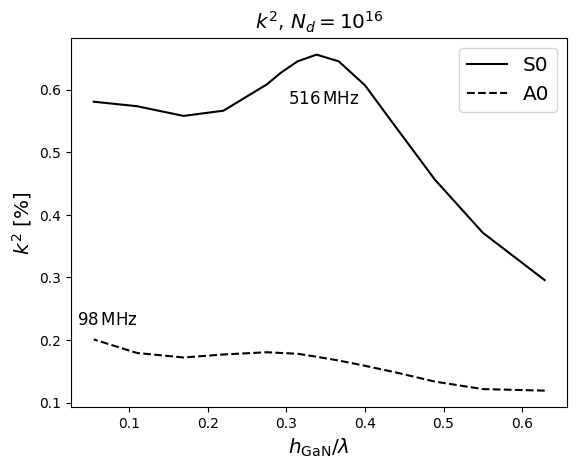

In [77]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$', fontsize='x-large')
ax.set_title(r'$k^2$, $N_d = 10^{16}$', fontsize='x-large')
ax.set_ylabel(r'$k^2$ [%]', fontsize='x-large')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_S0']*100, color='k', linestyle='-', label='S0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_A0']*100, color='k', linestyle='--', label=r'A0')
# Annotations
ax.legend(fontsize='x-large')
# Nd annotations in figure coordinates (left, midway up)
ax.annotate(r'$516\, \text{MHz}$', xy=(0.45, 0.76), xycoords='figure fraction', color='k', fontsize=12)
ax.annotate(r'$98\, \text{MHz}$', xy=(0.12, 0.3), xycoords='figure fraction', color='k', fontsize=12)

Text(0.47, 0.25, '$571\\, \\text{MHz}$')

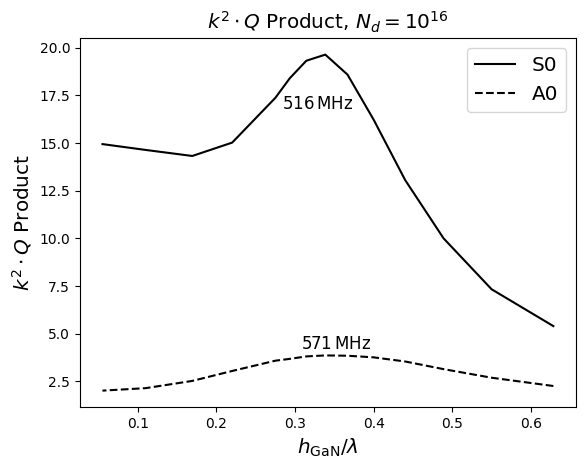

In [83]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$', fontsize='x-large')
ax.set_title(r'$k^2\cdot Q$ Product, $N_d = 10^{16}$', fontsize='x-large')
ax.set_ylabel(r'$k^2\cdot Q$ Product', fontsize='x-large')#$[\cdot 10^{11}]$')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_S0']*df['Q_Nd1e16_S0'], color='k', linestyle='-', label=r'S0')
ax.plot(df['hGaN/lambda'], df['ksq_Nd1e16_A0']*df['Q_Nd1e16_A0'], color='k', linestyle='--', label=r'A0')
ax.legend( fontsize='x-large') 
ax.annotate(r'$516\, \text{MHz}$', xy=(0.44, 0.75), xycoords='figure fraction', color='k', fontsize=12)
ax.annotate(r'$571\, \text{MHz}$', xy=(0.47, 0.25), xycoords='figure fraction', color='k', fontsize=12)



# Figure 5-25 from Popa Thesis
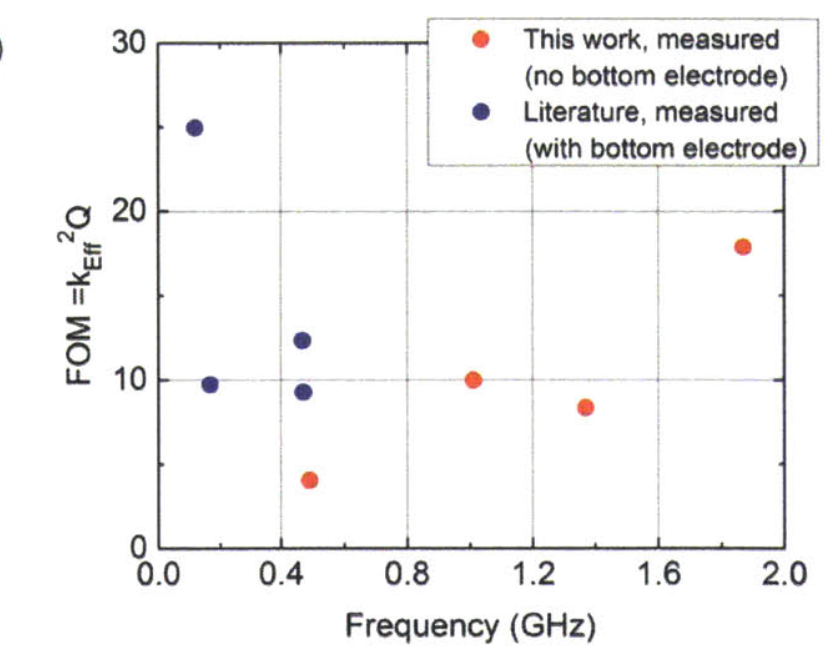

In [19]:
np.array([.2, .3, .45, .46])

array([0.2 , 0.3 , 0.45, 0.46])

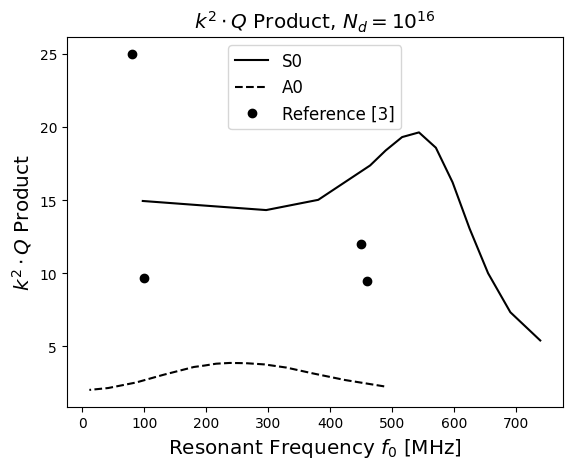

In [37]:
lit_fGHz = np.array([.08, .1, .45, .46])*1e9
lit_k2Q = np.array([25, 9.7, 12, 9.5])
fig, ax = plt.subplots()
ax.set_xlabel(r'Resonant Frequency $f_0$ [MHz]', fontsize='x-large')
ax.set_title(r'$k^2\cdot Q$ Product, $N_d = 10^{16}$', fontsize='x-large')
ax.set_ylabel(r'$k^2\cdot Q$ Product', fontsize='x-large')#$[\cdot 10^{11}]$')
ax.plot(df['eigS']/1e6, df['ksq_Nd1e16_S0']*df['Q_Nd1e16_S0'], color='k', linestyle='-', label=r'S0')
ax.plot(df['eigAS']/1e6, df['ksq_Nd1e16_A0']*df['Q_Nd1e16_A0'], color='k', linestyle='--', label=r'A0')
ax.plot(lit_fGHz/1e6, lit_k2Q, linestyle='none', marker='.',markersize='12', color='k', label = 'Reference [3]') 
ax.legend( fontsize='large', loc='upper center') 


Text(0.64, 0.66, '$625\\, \\text{MHz}$')

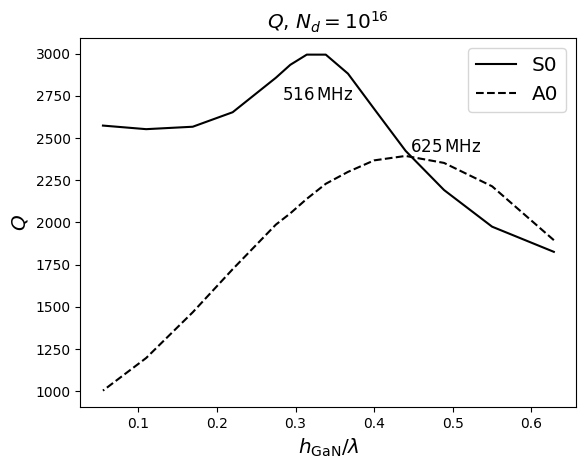

In [84]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$', fontsize='x-large')
ax.set_title(r'$Q$, $N_d = 10^{16}$', fontsize='x-large')
ax.set_ylabel(r'$Q$', fontsize='x-large')
ax.plot(df['hGaN/lambda'], df['Q_Nd1e16_S0'], color='k', linestyle='-', label = 'S0')
ax.plot(df['hGaN/lambda'], df['Q_Nd1e16_A0'], color='k', linestyle='--', label = 'A0')
# Annotations
ax.legend( fontsize='x-large')
# Nd annotations in figure coordinates (left, midway up)
ax.annotate(r'$516\, \text{MHz}$', xy=(0.44, 0.77), xycoords='figure fraction', color='k', fontsize=12)
ax.annotate(r'$625\, \text{MHz}$', xy=(0.64, 0.66), xycoords='figure fraction', color='k', fontsize=12)
#ax.yaxis.set_major_formatter(EngFormatter(unit=''))

Text(0.15, 0.75, 'Solid = S0')

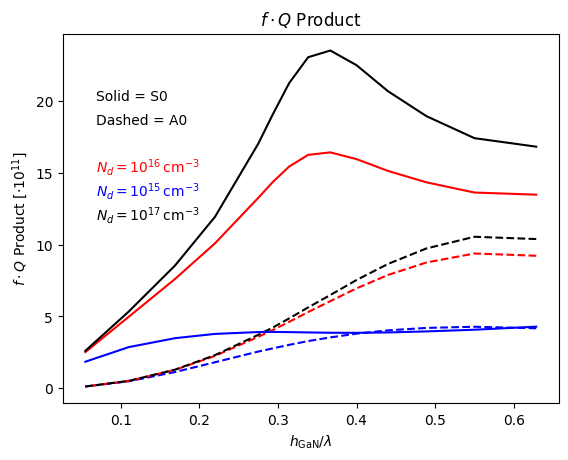

In [91]:

fig, ax = plt.subplots()

# Plot k^2 with square markers, no line
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e15_A0']/1e11, color='b', linestyle='--')
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e16_A0']/1e11, color='r', linestyle='--')
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e17_A0']/1e11, color='k', linestyle='--')
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e15_S0']/1e11, color='b', linestyle='-')
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e16_S0']/1e11, color='r', linestyle='-')
ax.plot(df['hGaN/lambda'], df['fQ_Nd1e17_S0']/1e11, color='k', linestyle='-')
# Engineering formatter without units
#ax.yaxis.set_major_formatter(EngFormatter(unit=''))
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title(r'$f\cdot Q$ Product')
ax.set_ylabel(r'$f\cdot Q$ Product $[\cdot 10^{11}]$')

# Annotations
# Nd annotations in figure coordinates (left, midway up)
ax.annotate(r'$N_d = 10^{16} \,\text{cm}^{-3}$', xy=(0.15, 0.6), xycoords='figure fraction', color='r', fontsize=10)
ax.annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.15, 0.55), xycoords='figure fraction', color='b', fontsize=10)
ax.annotate(r'$N_d = 10^{17} \,\text{cm}^{-3}$', xy=(0.15, 0.5), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
ax.annotate('Dashed = A0', xy=(0.15, 0.7), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.75), xycoords='figure fraction', color='k', fontsize=10)

#change to k^2*Q, with popa plot 

Text(0.5, 0.7, '$N_d = 10^{17} \\,\\text{cm}^{-3}$')

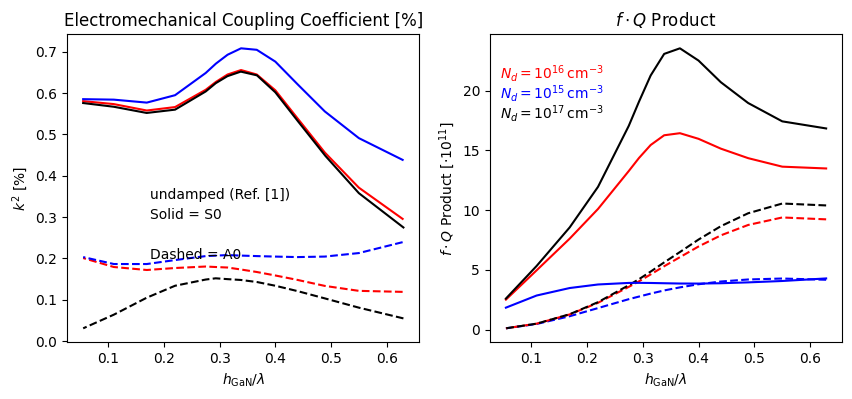

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(df['hGaN/lambda'], df['ksq_Nd1e16_A0']*100, color='r', linestyle='--', label = '-- A0')
axs[0].plot(df['hGaN/lambda'], df['ksq_Nd1e15_A0']*100, color='b', linestyle='--')#, label = r'$k^2 [\%]$')
axs[0].plot(df['hGaN/lambda'], df['ksq_Nd1e16_S0']*100, color='r', linestyle='-', label = '- S0')
axs[0].plot(df['hGaN/lambda'], df['ksq_Nd1e15_S0']*100, color='b', linestyle='-')#, label = r'$k^2 [\%]$')
axs[0].plot(undamped_df["hGan/Lambda"], undamped_df["Antisymmetric ksq%"], color='k', linestyle='--')#, label = r'$k^2 [\%]$')
axs[0].plot(undamped_df["hGan/Lambda"], undamped_df["Symmetric ksq%"], color='k', linestyle='-')#, label = r'$k^2 [\%]$')

#axs[0].annotate(r'$N_d = 10^{16} \,\text{cm}^{-3}$', xy=(0.1, 0.6), xycoords='figure fraction', color='r', fontsize=10)
#axs[0].annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.1, 0.55), xycoords='figure fraction', color='b', fontsize=10)
axs[0].annotate('undamped (Ref. [1])', xy=(0.15, 0.5), xycoords='figure fraction', color='k', fontsize=10)

axs[0].annotate('Dashed = A0', xy=(0.15, 0.35), xycoords='figure fraction', color='k', fontsize=10)
axs[0].annotate('Solid = S0', xy=(0.15, 0.45), xycoords='figure fraction', color='k', fontsize=10)
axs[0].set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
axs[0].set_title('Electromechanical Coupling Coefficient [%]')
axs[0].set_ylabel(r'$k^2$ [%]')


axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e15_A0']/1e11, color='b', linestyle='--')
axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e16_A0']/1e11, color='r', linestyle='--')
axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e17_A0']/1e11, color='k', linestyle='--')
axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e15_S0']/1e11, color='b', linestyle='-')
axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e16_S0']/1e11, color='r', linestyle='-')
axs[1].plot(df['hGaN/lambda'], df['fQ_Nd1e17_S0']/1e11, color='k', linestyle='-')

axs[1].set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
axs[1].set_title(r'$f\cdot Q$ Product')
axs[1].set_ylabel(r'$f\cdot Q$ Product $[\cdot 10^{11}]$')
axs[1].annotate(r'$N_d = 10^{16} \,\text{cm}^{-3}$', xy=(0.5, 0.8), xycoords='figure fraction', color='r', fontsize=10)
axs[1].annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.5, 0.75), xycoords='figure fraction', color='b', fontsize=10)
axs[1].annotate(r'$N_d = 10^{17} \,\text{cm}^{-3}$', xy=(0.5, 0.7), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
#axs[1].annotate('Dashed = A0', xy=(0.15, 0.7), xycoords='figure fraction', color='k', fontsize=10)
#axs[1].annotate('Solid = S0', xy=(0.15, 0.75), xycoords='figure fraction', color='k', fontsize=10)